# **Descrpetion**


**Introductuin :**
_`NAME : ABDULLAH`

This dataset contains synthetic data designed for predicting age based on various health and lifestyle factors. It includes 3,000 rows with 24 features, each representing different aspects of physical health and lifestyle.
                                                                             **Task :**                                                                                             
Task is to predict the Age of Human :

**Features:**

- **Height (cm)**: The height of the individual in centimeters.
- **Weight (kg)**: The weight of the individual in kilograms.
- **Blood Pressure (s/d)**: Blood pressure (systolic/diastolic) in mmHg.
- **Cholesterol Level (mg/dL)**: Cholesterol level in milligrams per deciliter.
- **BMI**: Body Mass Index, calculated from height and weight.
- **Blood Glucose Level (mg/dL)**: Blood glucose level in milligrams per deciliter.
- **Bone Density (g/cm²)**: Bone density in grams per square centimeter.
- **Vision Sharpness**: Vision sharpness on a scale from 0 (blurry) to 100 (perfect).
- **Hearing Ability (dB)**: Hearing ability in decibels.
- **Physical Activity Level**: Categorized as 'Low', 'Moderate', or 'High'.
- **Smoking Status**: Categorical values including 'Never', 'Former', and 'Current'.
- **Alcohol Consumption**: Frequency of alcohol consumption.
- **Diet**: Type of diet, categorized as 'Balanced', 'High Protein', 'Low Carb', etc.
- **Chronic Diseases**: Presence of chronic diseases (e.g., diabetes, hypertension).
- **Medication Use**: Usage of medication.
- **Family History**: Presence of family history of age-related conditions.
- **Cognitive Function**: Self-reported cognitive function on a scale from 0 (poor) to 100 (excellent).
- **Mental Health Status**: Self-reported mental health status on a scale from 0 (poor) to 100 (excellent).
- **Sleep Patterns**: Average number of sleep hours per night.
- **Stress Levels**: Self-reported stress levels on a scale from 0 (low) to 100 (high).
- **Pollution Exposure**: Exposure to pollution measured in arbitrary units.
- **Sun Exposure**: Average sun exposure in hours per week.
- **Education Level**: Highest level of education attained.
- **Income Level**: Annual income in USD.
- **Age (years)**: The target variable representing the age of the individual.

# **Import Necessary Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import KFold


# To suppress warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Load Datasets**

In [2]:
# Load the training and testing datasets
train_df = pd.read_csv('/kaggle/input/human-age-prediction-synthetic-dataset/Train.csv') 
test_df = pd.read_csv('/kaggle/input/human-age-prediction-synthetic-dataset/Test.csv')    


# **Data Exploration**

In [3]:
# Display the first few rows and all clolumns of the training dataset
pd.set_option('display.max_columns', None)
train_df.head()


,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,Former,NaN,Low-carb,NaN,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Current,Occasional,Balanced,Hypertension,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Never,NaN,Balanced,Hypertension,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Never,NaN,Balanced,Diabetes,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,Former,Frequent,Vegetarian,NaN,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [5]:
train_df.isnull().sum().sort_values(ascending=True)

Gender                            0
Sun Exposure                      0
Pollution Exposure                0
Stress Levels                     0
Sleep Patterns                    0
Mental Health Status              0
Cognitive Function                0
Diet                              0
Income Level                      0
Smoking Status                    0
Age (years)                       0
Hearing Ability (dB)              0
Vision Sharpness                  0
Bone Density (g/cm²)              0
Blood Glucose Level (mg/dL)       0
BMI                               0
Cholesterol Level (mg/dL)         0
Blood Pressure (s/d)              0
Weight (kg)                       0
Height (cm)                       0
Physical Activity Level           0
Education Level                 627
Medication Use                 1198
Alcohol Consumption            1201
Chronic Diseases               1299
Family History                 1451
dtype: int64

In [6]:
test_df.isnull().sum().sort_values(ascending=True)

Gender                            0
Sun Exposure                      0
Pollution Exposure                0
Stress Levels                     0
Sleep Patterns                    0
Mental Health Status              0
Cognitive Function                0
Diet                              0
Smoking Status                    0
Physical Activity Level           0
Income Level                      0
Vision Sharpness                  0
Bone Density (g/cm²)              0
Blood Glucose Level (mg/dL)       0
BMI                               0
Cholesterol Level (mg/dL)         0
Blood Pressure (s/d)              0
Weight (kg)                       0
Height (cm)                       0
Hearing Ability (dB)              0
Education Level                 627
Medication Use                 1198
Alcohol Consumption            1201
Chronic Diseases               1299
Family History                 1451
dtype: int64

<div style="text-align: center; font-size: 30px; color:blue">
<strong>Visualization of Data</strong>
</div>
                

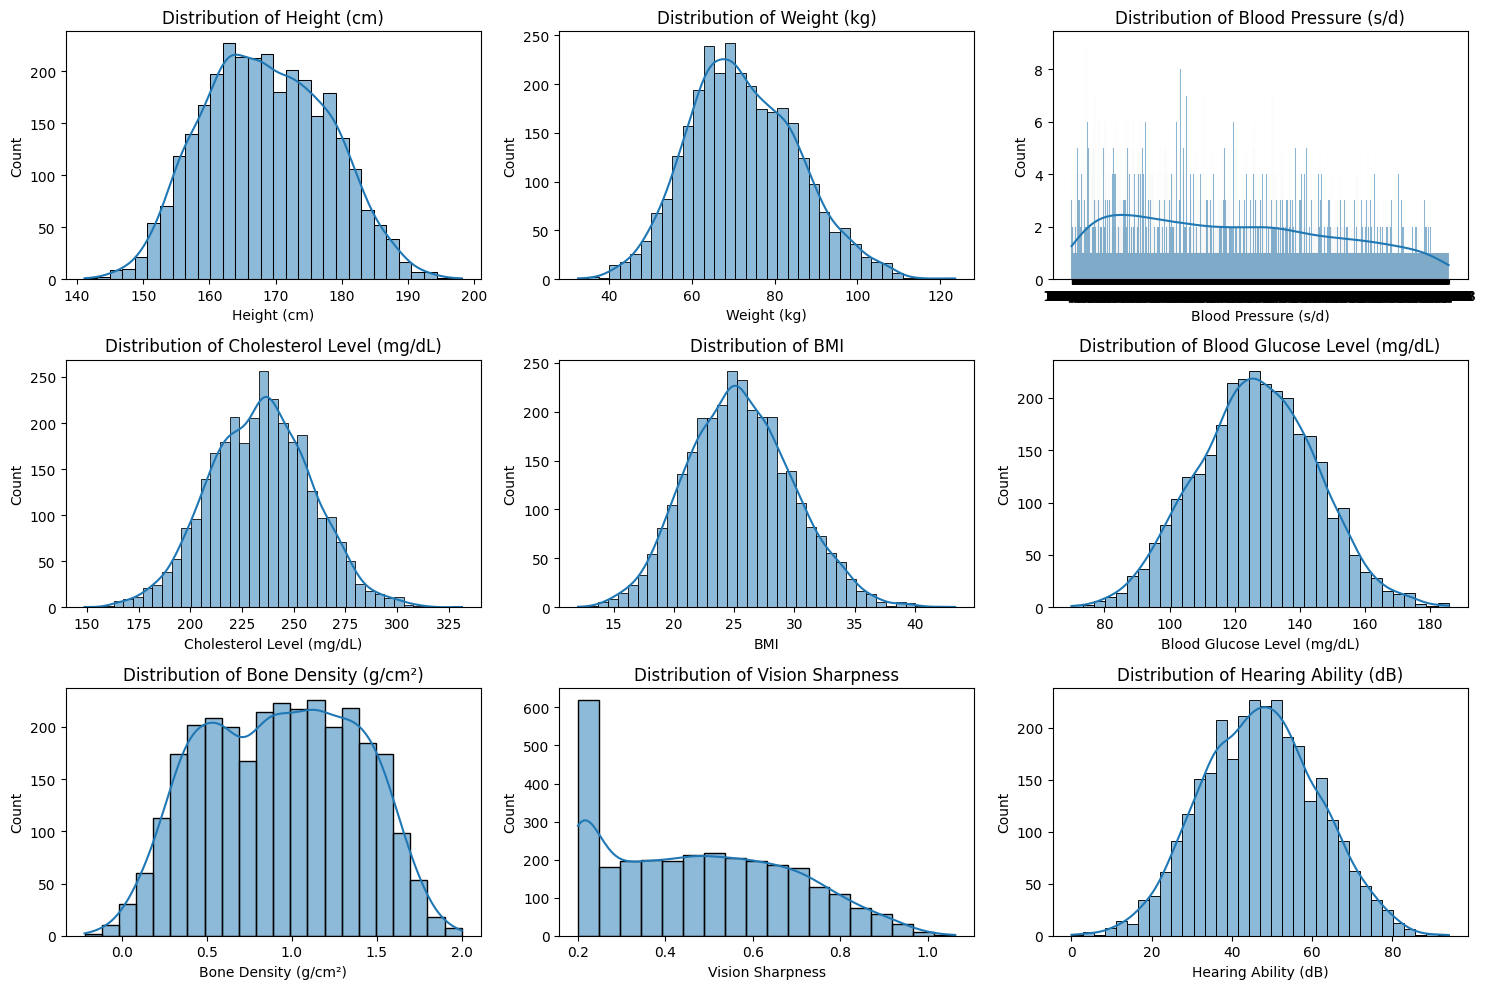

In [7]:
# List of numerical features for visualization
numerical_features = [
    'Height (cm)', 'Weight (kg)', 'Blood Pressure (s/d)', 'Cholesterol Level (mg/dL)', 
    'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)', 'Vision Sharpness', 
    'Hearing Ability (dB)'
]

# Plot distributions of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

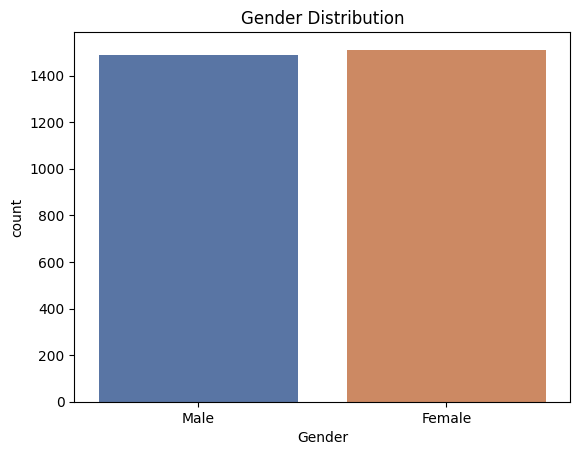

In [8]:
# Plot the distribution of gender
sns.countplot(x='Gender', data=train_df ,palette='deep')
plt.title('Gender Distribution')
plt.show()


# **Data Preprocessing**

<div style="text-align: center; font-size: 30px; color:blue">
<strong>Feature Engineering</strong>
</div>
                
         


<span style="color:orange">
"Blood Pressure" which have '/' this there is need to splitting  into 'Systolic' and 'Diastolic' and turning them into numbers helps with accurate analysis, making charts, and building models. This ensures the data is easy to work with and use.</span>


In [9]:
# Split the "Blood Pressure (s/d)" column into two separate columns
train_df[['Systolic_BP', 'Diastolic_BP']] = train_df['Blood Pressure (s/d)'].str.split('/', expand=True)
test_df[['Systolic_BP', 'Diastolic_BP']] = test_df['Blood Pressure (s/d)'].str.split('/', expand=True)
# Convert the new columns to numeric values
train_df['Systolic_BP'] = pd.to_numeric(train_df['Systolic_BP'])
train_df['Diastolic_BP'] = pd.to_numeric(train_df['Diastolic_BP'])

test_df['Systolic_BP'] = pd.to_numeric(test_df['Systolic_BP'])
test_df['Diastolic_BP'] = pd.to_numeric(test_df['Diastolic_BP'])

# Drop the original "Blood Pressure (s/d)" column if it's no longer needed
train_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)
test_df.drop(columns=['Blood Pressure (s/d)'], inplace=True)


In [10]:
train_df.head()

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,Smoking Status,Alcohol Consumption,Diet,Chronic Diseases,Medication Use,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years),Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,Former,NaN,Low-carb,NaN,NaN,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,Current,Occasional,Balanced,Hypertension,NaN,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,Never,NaN,Balanced,Hypertension,Regular,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,Never,NaN,Balanced,Diabetes,Occasional,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,Former,Frequent,Vegetarian,NaN,NaN,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106


<div style="text-align:center; font-size: 30px; color:blue">
<strong>Handle Numarical Missing Values </strong>
</div>

In [11]:
# Example: Filling missing values with the median
num_features = test_df.select_dtypes(include=[np.number])
for column in num_features:
    train_df[column].fillna(train_df[column].median(), inplace=True)

# Repeat for the test data if necessary
for column in num_features:
    test_df[column].fillna(test_df[column].median(), inplace=True)


<div style="text-align:center; font-size: 30px; color:blue">
<strong>Handle Cetegorical Missing Values </strong>
</div>

In [12]:
# List of columns with missing values
cat_missing_values = ['Education Level', 'Alcohol Consumption', 'Chronic Diseases', 'Medication Use', 'Family History']

# Fill missing values with the most frequent value for each column in the list
for column in cat_missing_values:
    most_frequent = train_df[column].mode()[0]
    # Fill missing values in both training and test sets with the computed most frequent value
    train_df[column].fillna(most_frequent, inplace=True)
    test_df[column].fillna(most_frequent, inplace=True)

# Drop the columns from both training and test sets
train_df.drop(columns=cat_missing_values, inplace=True)
test_df.drop(columns=cat_missing_values, inplace=True)


In [13]:
test_df.columns

Index(['Gender', 'Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)',
       'BMI', 'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Physical Activity Level',
       'Smoking Status', 'Diet', 'Cognitive Function', 'Mental Health Status',
       'Sleep Patterns', 'Stress Levels', 'Pollution Exposure', 'Sun Exposure',
       'Income Level', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

<div style="text-align:center; font-size: 30px; color:blue">
<strong>Encoding</strong>
</div>

In [14]:

label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Smoking Status', 'Sleep Patterns',
                        'Diet','Physical Activity Level','Income Level',
                          'Mental Health Status']



label_encoder = LabelEncoder()

# Encode each categorical column
for feature in categorical_features:
    # Fit and transform on train data
    train_df[feature] = label_encoder.fit_transform(train_df[feature])
    
    # Transform on test data (using the same encoding as train data)
    test_df[feature] = label_encoder.transform(test_df[feature])


# **Model Building**

<div style="text-align:center; font-size: 30px; color:blue">
<strong>Split Data</strong>
</div>

In [15]:
# Define your features and target
X = train_df.drop(columns=['Age (years)'])
y = train_df['Age (years)']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="text-align:center; font-size: 30px; color:blue">
<strong>Feature Scalling</strong>
</div>

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_val)


<div style="text-align:center; font-size: 30px; color:blue">
<strong>Model Traning and Evaluation</strong>
</div>

In [17]:

# Initialize 

model=RandomForestClassifier(random_state=42,n_estimators=100)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f'Validation Mean Squared Error: {mse}')


Validation Mean Squared Error: 50.205


<div style="text-align:center; font-size: 30px; color:blue">
<strong>Feature Importance</strong>
</div>

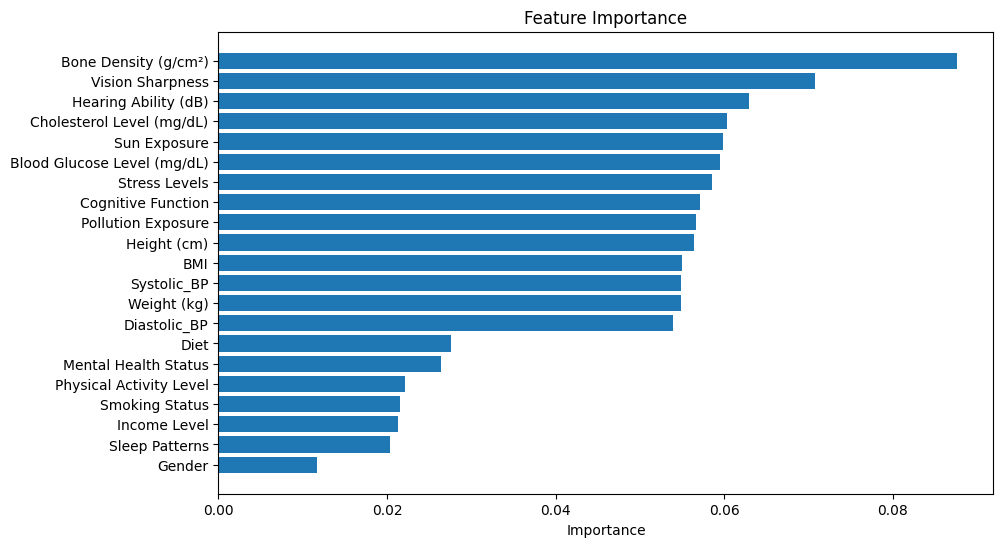

In [18]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()



# **Summary of the Notebook**

1. **Dataset Preprocessing**:
   - **Loading Data**: The dataset was loaded and initially explored.
   - **Data Cleaning**: Handled missing values and converted categorical variables to numerical using encoding techniques.
   - **Feature Engineering**: New features were created to capture more information (e.g., height/weight ratio).

2. **Model Training**:
   - **Initial Model**: A basic RandomForestRegressor model was trained to predict a target variable.
   - **Model Evaluation**: The model's performance was evaluated using the Mean Squared Error (MSE) on the validation set.

3. **Feature Importance**:
   - **Extracting Importance**: Calculated the feature importance from the trained XGBoost model.
   - **Feature Analysis**: Identified key features influencing the model's predictions.

4. **Ensemble Methods**:
   - **Improving Performance**: Discussed combining models (e.g., RandomForest and XGBoost) through ensemble methods to improve overall performance.

5. **Performance Enhancement**:
   - **Feature Scaling**: Suggested normalizing or standardizing features to improve model performance.
   - **Cross-Validation and Resampling**: Recommended using K-Fold Cross-Validation to ensure consistency and resampling techniques like SMOTE for handling imbalanced data.

6. **Hyperparameter Tuning for RandomForestClassifier**:
   - Suggested hyperparameter tuning for a RandomForestClassifier, including parameter grids for the number of estimators, max depth, and minimum samples split.
